<a href="https://colab.research.google.com/github/MohitM-AG/Projects/blob/WinDS/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, BatchNormalization, Flatten, Dropout


In [2]:
img_set = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = img_set.load_data()



print('\nTrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('Test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))
print('Test_labels.shape: {}, of {}'.format(test_labels.shape, test_labels.dtype))


Train_images.shape: (50000, 32, 32, 3), of uint8
Test_images.shape: (10000, 32, 32, 3), of uint8
Test_labels.shape: (10000, 1), of uint8


In [3]:
train_labels = train_labels.reshape(-1,)
print('Test_labels.shape: {}, of {}'.format(test_labels.shape, test_labels.dtype))

Test_labels.shape: (10000, 1), of uint8


In [4]:

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample(X, y, index):

  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


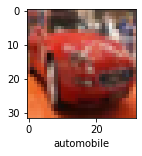

In [5]:
plot_sample(train_images, train_labels, 5)

In [6]:
INPUT_SHAPE = (32, 32, 3)

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))


# compile model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# view model layers
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [7]:
EPOCHS = 20
train_images_scaled = train_images / 255.

history = model.fit(train_images_scaled, train_labels,
batch_size=64,
validation_split = 0.1, epochs=EPOCHS,
verbose=1)

Epoch 1/20
704/704 [==============================] - 263s 372ms/step - loss: 1.8387 - accuracy: 0.3862 - val_loss: 1.3183 - val_accuracy: 0.5186
Epoch 2/20
704/704 [==============================] - 268s 380ms/step - loss: 1.2516 - accuracy: 0.5515 - val_loss: 1.1695 - val_accuracy: 0.5796
Epoch 3/20
704/704 [==============================] - 271s 385ms/step - loss: 1.0740 - accuracy: 0.6174 - val_loss: 1.1881 - val_accuracy: 0.5766
Epoch 4/20
704/704 [==============================] - 266s 378ms/step - loss: 0.9522 - accuracy: 0.6655 - val_loss: 0.9664 - val_accuracy: 0.6650
Epoch 5/20
704/704 [==============================] - 267s 379ms/step - loss: 0.8704 - accuracy: 0.6935 - val_loss: 0.8303 - val_accuracy: 0.7162
Epoch 6/20
704/704 [==============================] - 272s 386ms/step - loss: 0.8027 - accuracy: 0.7185 - val_loss: 0.8889 - val_accuracy: 0.6890
Epoch 7/20
704/704 [==============================] - 272s 387ms/step - loss: 0.7471 - accuracy: 0.7388 - val_loss: 0.6973 -

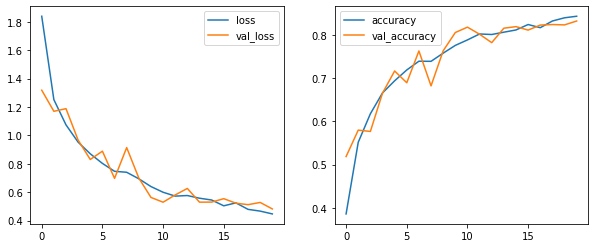

In [8]:
import pandas as pd

fig, ax = plt.subplots(1, 2, figsize=(10, 4))


history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

313/313 [==============================] - 15s 47ms/step


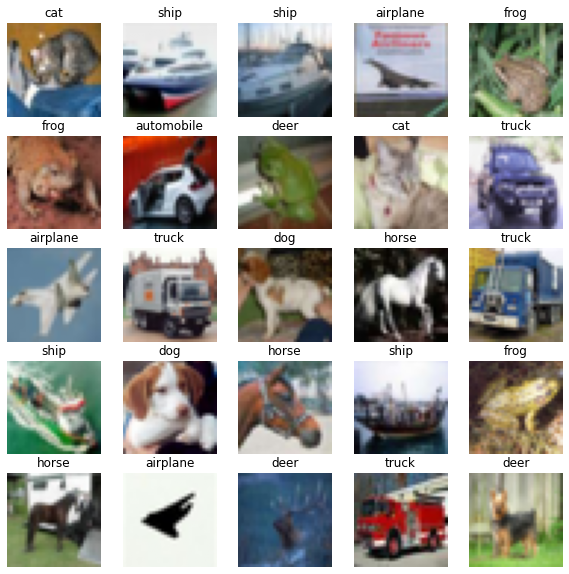

In [15]:
test_images_scaled = test_images / 255.
predictions = model.predict(test_images_scaled)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(test_images_scaled[i])
    axes[i].set_title(classes[np.argmax(predictions[i])])
    axes[i].axis('off')
plt.show()

In [10]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([3, 8, 8, 0, 6])

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

print(classification_report(test_labels, prediction_labels, target_names=classes))
pd.DataFrame(confusion_matrix(test_labels, prediction_labels), index=classes, columns=classes)

              precision    recall  f1-score   support

    airplane       0.80      0.87      0.84      1000
  automobile       0.94      0.90      0.92      1000
        bird       0.84      0.68      0.75      1000
         cat       0.79      0.59      0.68      1000
        deer       0.74      0.88      0.80      1000
         dog       0.75      0.77      0.76      1000
        frog       0.80      0.91      0.85      1000
       horse       0.89      0.85      0.87      1000
        ship       0.90      0.92      0.91      1000
       truck       0.86      0.92      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,874,10,17,5,15,2,3,7,46,21
automobile,10,904,1,0,0,2,5,0,16,62
bird,70,1,683,21,89,49,64,10,6,7
cat,23,3,36,593,79,144,77,19,10,16
deer,11,2,21,15,879,12,30,27,3,0
dog,12,0,22,82,47,767,26,34,3,7
frog,7,1,20,18,23,13,907,4,3,4
horse,15,2,9,13,54,37,11,847,0,12
ship,40,11,5,1,3,0,7,2,915,16
truck,24,31,1,2,1,2,2,2,15,920
